In [31]:
import pandas as pd
import matplotlib.pyplot as plt           
import random 
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Data understanding + Data Preprocessing 

In [32]:
df1 = pd.read_excel('Scrapped.xls')
df3 = pd.read_excel('tot.xls')
df=pd.concat([df1,df3])

In [33]:
df.head()

,Problem,Answer,Grade
0,\r\n\t\t\t\t\t\t\t\t\t\t During the summer ...,4 hours.,5th
1,\r\n\t\t\t\t\t\t\t\t\t\t Our class made 360 ...,360:40=9.,5th
2,\r\n\t\t\t\t\t\t\t\t\t\t\tMom bought her daugh...,4*24+6*18=204.,5th
3,\r\n\t\t\t\t\t\t\t\t\t\t\t5th grade students g...,3 buses.,5th
4,\r\n\t\t\t\t\t\t\t\t\t\t\tYour mom bought you ...,$25.,5th


In [34]:
# replacing \n\r\t with ''
df = df.replace('[\n\r\t]','', regex=True)
df

,Problem,Answer,Grade
0,"During the summer holidays, Ginny earns ex...",4 hours.,5th
1,Our class made 360 ​​cookies for the school...,360:40=9.,5th
2,Mom bought her daughter Molly 4 gifts of $24 e...,4*24+6*18=204.,5th
3,5th grade students going on an excursion. This...,3 buses.,5th
4,Your mom bought you a one-year tennis pass for...,$25.,5th
...,...,...,...
2370,Shane has 21 meters of yellow ribbon and 42 me...,21 ÷ 3/7 = 49 She can have 49 smaller pieces o...,Grade 5
2371,She used 1/3 of a package of sequins and 4/5 s...,1/3 ÷ 4 x 7 = 7/12 She needs 7/12 pack of sequ...,Grade 5
2372,Her assistant can sew 5 identical pairs of pan...,1/4 ÷ 5 = 1/20 It takes 1/20 day to sew 1 pair...,Grade 5
2373,Francine used 5/7 meters of yarn to string one...,70 ÷ 5/7 = 98 She can string 98 notebooks from...,Grade 5


In [35]:
df.Grade.value_counts()

Grade 6    1306
8-10        326
3rd         206
Grade 2     147
Grade 5     101
Grade 3     100
Grade 1      99
5th          96
Grade 4      95
4th          66
2nd          30
Grade2        2
Name: Grade, dtype: int64

In [36]:
df['Grade']=df['Grade'].replace('5th',' 5').replace('4th', ' 4').replace('3rd', ' 3').replace('2nd', ' 2').replace('8-10', ' 4').replace('Grade 1', ' 1').replace('Grade 2', ' 2').replace('Grade 3', ' 3').replace('Grade 4', ' 4').replace('Grade 5', ' 5').replace('Grade 6', ' 6').replace('Grade2', ' 2')

In [37]:
df.head()

,Problem,Answer,Grade
0,"During the summer holidays, Ginny earns ex...",4 hours.,5
1,Our class made 360 ​​cookies for the school...,360:40=9.,5
2,Mom bought her daughter Molly 4 gifts of $24 e...,4*24+6*18=204.,5
3,5th grade students going on an excursion. This...,3 buses.,5
4,Your mom bought you a one-year tennis pass for...,$25.,5


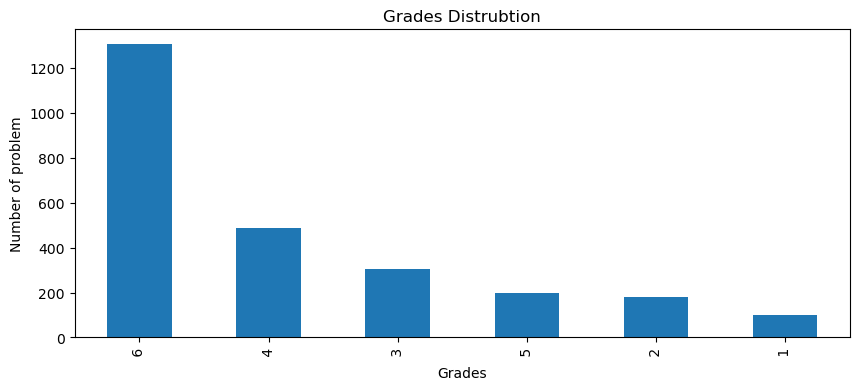

In [38]:
Grade=['1','2','3','4','5','6']
plt.figure(figsize=(10,4))
plt.title("Grades Distrubtion")
plt.ylabel("Number of problem")
plt.xlabel("Grades")
df.Grade.value_counts().plot(kind='bar');

In [39]:
# Clean and preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Nour
[nltk_data]     chkiwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def clean_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Apply stemming
    stemmer = nltk.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [41]:
df['Problem'] = df['Problem'].apply(clean_text)

# Grade prediction with multiclass logistic regression model

In [42]:
# Split the dataset into features (X) and target variable (y) 
X = df.apply(lambda x: x.Problem+x.Answer,axis=1)
y = df["Grade"]

In [43]:
# There are a few situations where Count Vectorizer can work better than Tfidf.
# One is if your text data is very short – in this case, you may get better results using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a multiclass logistic regression model
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train)
# Use the model to predict the labels for the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8757281553398059


In [45]:
topre = pd.read_excel('EDCRAFT.xlsx')
topre['Problem'] = topre['Problem'].apply(clean_text)
Xp =topre.apply(lambda x: x.Problem+str(x.Answer),axis=1)
Xp_transformed = vectorizer.transform(Xp)
ypred = model.predict(Xp_transformed)

In [46]:
#Grade prediction on the dataset
topre["Grade"] = ypred
topre.head()

,Problem,Answer,Grade
0,peter eight appl denni give peter three mani a...,8 apples + 3 apples = 11 apples.,4
1,ann seven candi lack give seven candi mani can...,7 candies + 7 candies = 14 candies.,1
2,walter two book matt nine book matt give book ...,2 books + 9 books = 11 books.,1
3,three crayon tabl albert put five crayon tabl ...,3 crayons + 5 crayons = 8 crayons.,1
4,bill nine orang friend one orang friend give o...,9 oranges + 1 orange = 10 oranges.,1


In [47]:
df_f=pd.concat([df,topre])

In [48]:
df_f

,Problem,Answer,Grade
0,summer holiday ginni earn extra money mow lawn...,4 hours.,5
1,class made 360 cooki school fair famili prepar...,360:40=9.,5
2,mom bought daughter molli 4 gift 24 sun max 6 ...,4*24+6*18=204.,5
3,5th grade student go excurs mean 125 student m...,3 buses.,5
4,mom bought oneyear tenni pass 300she make 12 p...,$25.,5
...,...,...,...
87,8 x peopl orchard later noon 27 peopl left orc...,x = 30 + 27 = 57 people,5
88,toni sprint 22 mile 4 mile per hour long toni ...,22 miles divided by 4 miles per hour = 5.5 ho...,4
89,danni walk 15 mile 3 mile per hour long danni ...,15 miles divided by 3 miles per hour = 5 hours.,4
90,roy sprint 30 mile 6 mile per hour long roy sp...,30 miles divided by 6 miles per hour = 5 hours.,4


# Conetent based recommender system

In [75]:
df_f['Grade'] = pd.to_numeric(df_f['Grade'], errors='coerce')

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = CountVectorizer(stop_words='english', max_df=0.9)


grade = 5
df_filtered = df_f[df_f['Grade'] == grade]

if not df_filtered.empty:
    # Convert text data into a proper format
    corpus = df_filtered['Problem'].values.astype('U')
    tfidf_matrix = vectorizer.fit_transform(corpus)

    # Calculate cosine similarity between TF-IDF vectors
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Recommend similar problems for a given problem index
    problem_index = 2
    similar_problem_indices = similarity_matrix[problem_index].argsort()[::-1][1:4]

    for i in similar_problem_indices:
        print(df_filtered["Problem"][i])
else:
    print(f"No problems found for grade {grade}.")

mom bought daughter molli 4 gift 24 sun max 6 gift 18 eachhow much money spend total
mom bought oneyear tenni pass 300she make 12 payment much money pay pass
bob 24 pencil box eighteen pencil 2 mark 6 mark fraction pencil mark 3


# Grade Predection (Decision Tree Classifer, naive bayes, SVM)

In [105]:
#Decision Tree Classifer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [106]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8033635187580854


In [108]:
#naive bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
nb = Pipeline([
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=Grade))

accuracy 0.7904269081500647
              precision    recall  f1-score   support

           1       1.00      0.03      0.05        37
           2       0.90      0.51      0.65        53
           3       0.83      0.63      0.71        99
           4       0.79      0.78      0.78       135
           5       0.68      0.47      0.56        55
           6       0.79      0.99      0.88       394

    accuracy                           0.79       773
   macro avg       0.83      0.57      0.61       773
weighted avg       0.80      0.79      0.76       773



In [110]:
#Linear Support Vector Machine
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=Grade))

accuracy 0.8680465717981889
              precision    recall  f1-score   support

           1       0.64      0.57      0.60        37
           2       0.70      0.70      0.70        53
           3       0.84      0.77      0.80        99
           4       0.79      0.81      0.80       135
           5       0.79      0.67      0.73        55
           6       0.95      0.99      0.97       394

    accuracy                           0.87       773
   macro avg       0.78      0.75      0.77       773
weighted avg       0.86      0.87      0.87       773



In [111]:
Xp =topre.apply(lambda x: x.Problem+str(x.Answer),axis=1)
Xp_transformed = vectorizer.transform(Xp)

In [112]:
ypred = sgd.predict(Xp_transformed)
topre["Grade"] = ypred
topre.head()

,Problem,Answer,Grade
0,peter eight appl denni give peter three mani a...,8 apples + 3 apples = 11 apples.,4
1,ann seven candi lack give seven candi mani can...,7 candies + 7 candies = 14 candies.,1
2,walter two book matt nine book matt give book ...,2 books + 9 books = 11 books.,2
3,three crayon tabl albert put five crayon tabl ...,3 crayons + 5 crayons = 8 crayons.,3
4,bill nine orang friend one orang friend give o...,9 oranges + 1 orange = 10 oranges.,1
